# Comparing the Models performance

Imports

In [10]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Loading Dataset/Models

In [2]:
x_train = pd.read_csv("../Dataset//x_train.csv")
y_train = pd.read_csv("../Dataset//y_train.csv")

x_test = pd.read_csv("../Dataset//x_test.csv")
y_test = pd.read_csv("../Dataset//y_test.csv")


In [3]:
dec_tree = pickle.load(open('../Models//Decision_tree.pkl', 'rb'))
rand_for = pickle.load(open('../Models//Random_forest.pkl', 'rb'))
svm = pickle.load(open('../Models//svm.pkl', 'rb'))
xgb = pickle.load(open('../Models//xgb.pkl', 'rb'))

Fitting Models

In [4]:
dec_tree.fit(x_train, y_train)
rand_for.fit(x_train, y_train)
svm.fit(x_train, y_train)
xgb.fit(x_train, y_train)

C:\Users\Sameed\AppData\Local\Temp\ipykernel_15984\3124142538.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_for.fit(x_train, y_train)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [5]:
y_pred_dec_tree = dec_tree.predict(x_test)
y_pred_rand_for = rand_for.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_xgb = xgb.predict(x_test)

y_preds = [y_pred_dec_tree, y_pred_rand_for, y_pred_svm, y_pred_xgb]

Visualizing the performance

In [6]:
accs = []
pres = []
res = []
f1s = []

matrixs = []

classifiers = ["Dec_Tree","R_Forest", "SVM", "XGBoost"]

for y_pred in y_preds:

    # print(classification_report(y_test, y_pred))

    accs.append(accuracy_score(y_test, y_pred))
    pres.append(precision_score(y_test, y_pred,average="macro"))
    res.append(recall_score(y_test, y_pred,average="macro"))
    f1s.append(f1_score(y_test, y_pred,average="macro"))


    cm = confusion_matrix(y_test, y_pred)
    matrixs.append(cm)

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


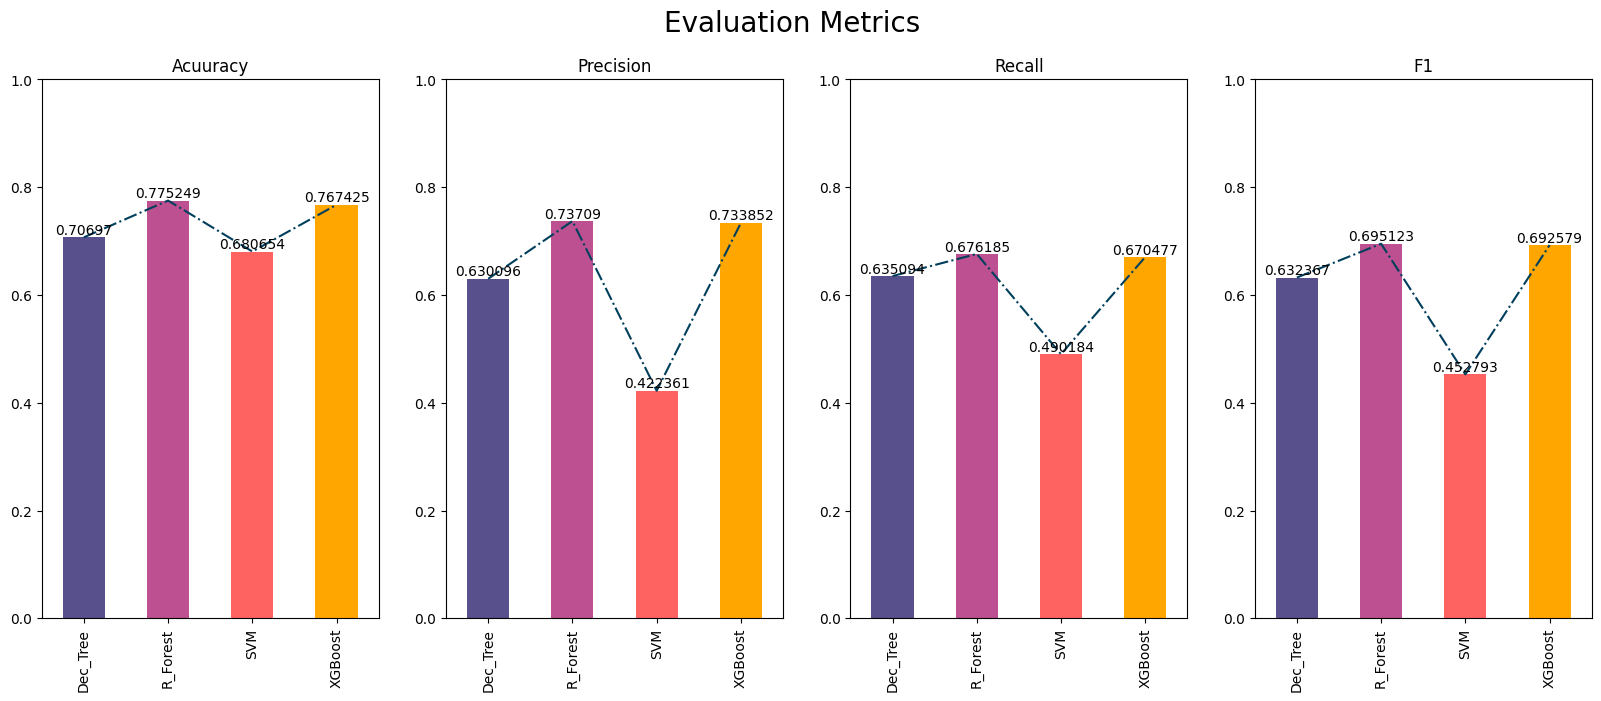

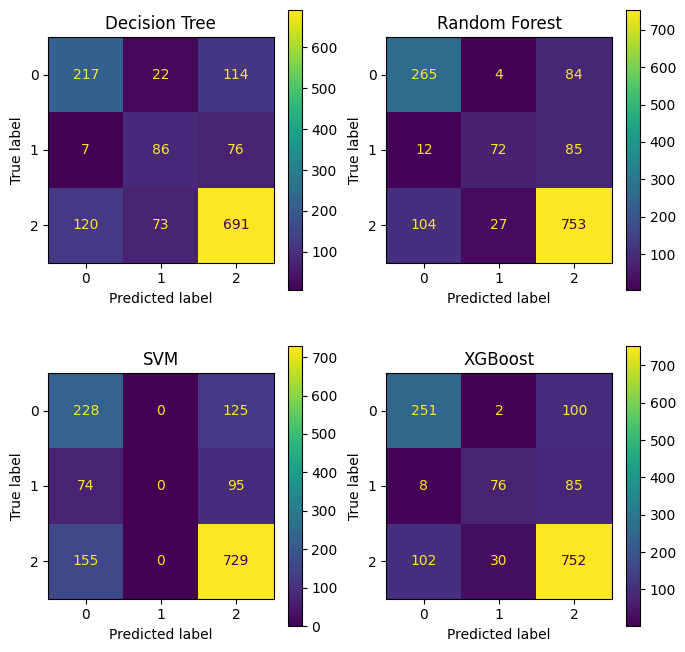

In [11]:

# figure = plt.subplots(1, 4,figsize=(20, 7))
# figure.suptitle("Eval Metrics", fontsize=25)

f, axs = plt.subplots(1, 4, figsize=(20, 7))
plt.suptitle("Evaluation Metrics",fontsize=20)

accs=pd.Series(accs)
plt.subplot(1, 4, 1)
plt.title("Acuuracy")
fig = accs.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(accs,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


pres=pd.Series(pres)
plt.subplot(1, 4, 2)
plt.title("Precision")
fig = pres.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(pres,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


res=pd.Series(res)
plt.subplot(1, 4, 3)
plt.title("Recall")
fig = res.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(res,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


f1s=pd.Series(f1s)
plt.subplot(1, 4, 4)
plt.title("F1")
fig = f1s.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(f1s,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


f, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].set_title("Decision Tree")
ConfusionMatrixDisplay(confusion_matrix=matrixs[0]).plot(ax=axes[0, 0])

axes[0, 1].set_title("Random Forest")
ConfusionMatrixDisplay(confusion_matrix=matrixs[1]).plot(ax=axes[0, 1])

axes[1, 0].set_title("SVM")
ConfusionMatrixDisplay(confusion_matrix=matrixs[2]).plot(ax=axes[1, 0])

axes[1, 1].set_title("XGBoost")
ConfusionMatrixDisplay(confusion_matrix=matrixs[3]).plot(ax=axes[1, 1])


plt.show()
